# Fly Flip Notebook
- First label images front and back
Then what we will do and then we can see if they face the front
- First orient all the images so they face the front...
- Second we will take the mean mask and ensure that it is oriented in the center so all masks need to be centered in the image
-

Will then use the average/mean mask as a template. With this template we should be able to compare to the original images and then determine the orientation.

Then will examine effectivness on test dataset..

Phases:
1. Import Depandencies
2. Set Data Source
3. Perform Image Labeling
    - Currently using OpenCV Method
    - Next Method: Using Tkinter GUI
4. Development of Average Mask
5. MSE Comparison
6. Plot of MSE

## Import Libraries

In [1]:
# Import Libraries
import sys
import os
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cv2
import copy
import glob
import tkinter as tk
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
# plot_dir = os.path.join(current_dir,'plotting')
sys.path.append(current_dir)
# print(sys.path)
from lib.plotting import polarplot as polarplt# polar plotting module
from lib.parsing import basic_sections as bsc_sec # basic data parsing methods
from lib.parsing.data_range import find_startdata, find_enddata # setting start and end of analysis region 
from lib.parsing.exact_exp_groups import sub_exp_group  # more dataparsing methods
from lib.led_convert import get_LED_angle_in_rad
from lib.plotting.flyviz import get_contour_centroid, get_objectmask, get_fill_flymask, contour_hrz_matrix
from scipy import interpolate
from find_fly_angle.find_fly_anglev2 import *

/Users/jarower/Desktop/flyplot
Initialized Plotting Package
Initialized Parsing Package


## Set Data Source

Provide path to the image dataset that will be referenced throughout this notebook.

In [2]:
# Path to Image Dataset
data = glob.glob('/Volumes/No Name/20240502125110/*.png')

Determine the number of images in the dataset

In [3]:
for f in range(len(data)):
# np.where(file.split('/')[-1].strip('.png') == 20240502125110_5669')
    if data[f].split('/')[-1].split('\\')[-1].strip('.png') == '20240502125110_1332':
        print(f)

1137


## (Optional) Test Image

To ensure that all dependancies are working appropriately, an image source internally within this package will be used to test the `contour_hrz_matrix` method.

Alternatively, you can utilize a different image.

In [4]:
file ="20240415120905_0121"
file_name = "imgs/" + file +".png"
fly_mask_orig, fly_mask_hrz,max_contour_hrz,centroid_hrz, body_axis_pt_0_hrz,body_axis_pt_1_hrz, angle_og, angle_rot = contour_hrz_matrix(file_name)

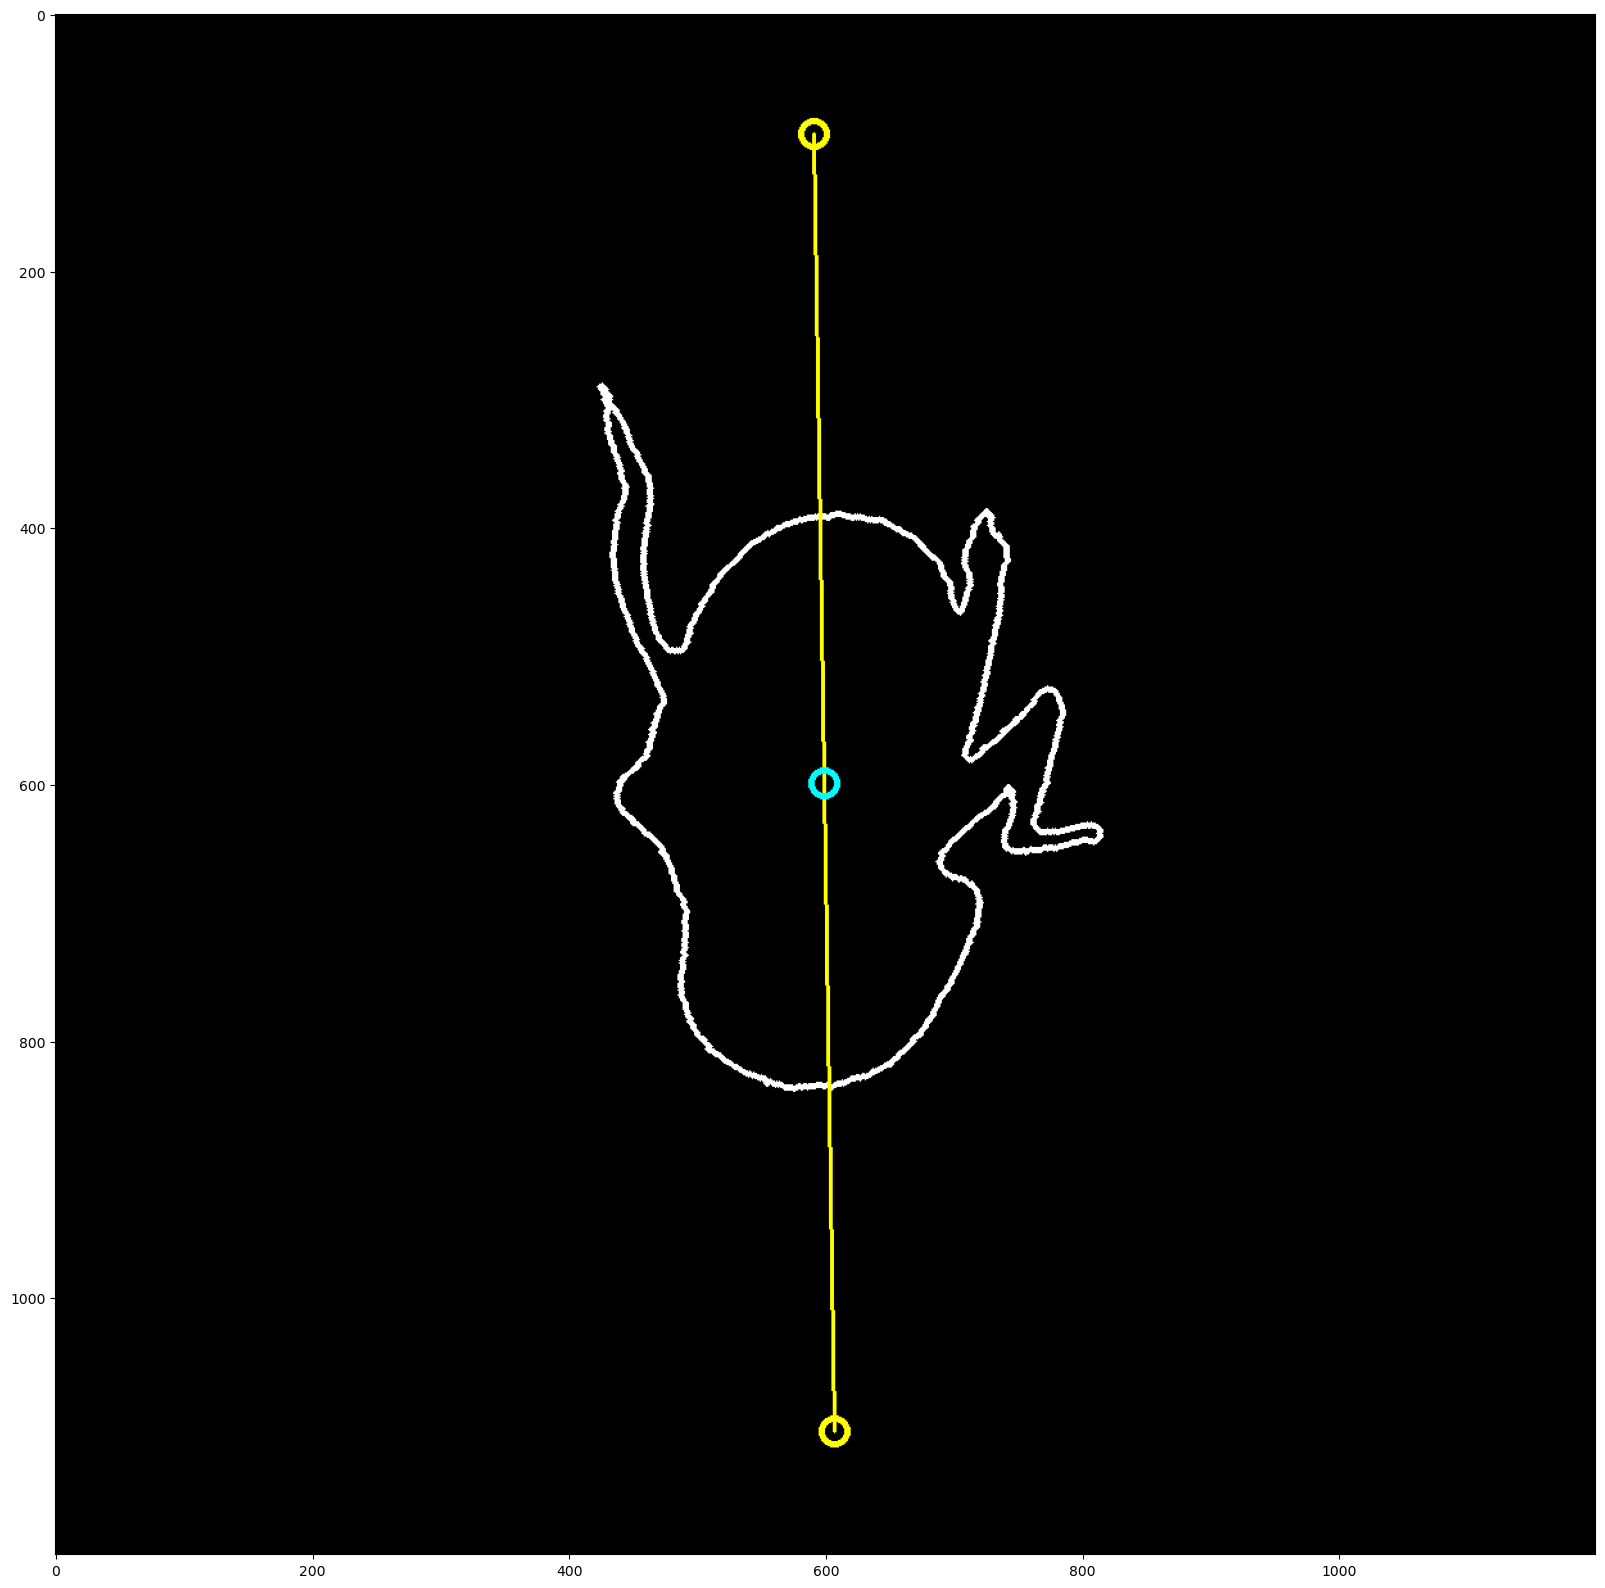

In [5]:
plt.figure(figsize=(20,20))
mask_fly = get_objectmask(fly_mask_hrz,max_contour_hrz)

cv2.circle(mask_fly,body_axis_pt_0_hrz,10, color = (255,255,0),thickness =3)
cv2.circle(mask_fly,body_axis_pt_1_hrz,10, color = (255,255,0),thickness =3)
cv2.line(mask_fly,body_axis_pt_0_hrz,body_axis_pt_1_hrz,color = (255,255,0), thickness = 2)
cv2.circle(mask_fly,centroid_hrz,10,color = (0,255,255),thickness=3)
plt.imshow(mask_fly)

## Labeling
After verifying that your dependancies are working, proceed to label 20 random images of flies from the path provided initially. The labeling process is to assign each image an indication of whether or not the Non Rotated or Rotated image best represents a Fly.

Three Images will be displayed, with the first image represeting the original fly orientation, the second the rotated and transformed fly based on it's orientation (which will allow it to be oriented along the central vertical axis). The last image is a subsequent 180 degree rotation of the fly after the initial rotation and transformation....

Essentially the labeling is a selection between the last two images. After making this selection that image will be saved in order to generate an average mask.

The Criteria for Labeling:
- Fly head facing up in an image then use the respective 'n' or 'r' to assign that image to the fly. with `n` corresponding to `No Rotation` and `r` corresponding to `Rotation`

In [8]:
imgs = {}
import time
import glob
import random
def img_label(filename):
    """
    For each image we will need to ensure that the proper rotation is performed such that it is in the 
    top down rotation
    
    """
    fly_mask_orig, fly_mask_hrz,max_contour_hrz,centroid_hrz, body_axis_pt_0_hrz,body_axis_pt_1_hrz,angle_og,angle_rot= contour_hrz_matrix(filename)
# mask_fly_norot = get_objectmask(fly_mask_hrz,max_contour_hrz)
    mask_fly_rot = cv2.rotate(copy.deepcopy(fly_mask_hrz),cv2.ROTATE_180)
    dict_img ={
        "n": fly_mask_hrz,
        "r":mask_fly_rot
    }
#     for i in range(1):
    ## test various rotations (0 or 180)
    fig = plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(fly_mask_orig,cmap='gray')
    print(f"<< Original Angle: {np.rad2deg(angle_og)} >>")
    plt.subplot(1,3,2)
    plt.title("No Rotation")
    # print("No Rotation Angle:",np.rad2deg(angle))
    print(f"<< No Rotation Angle: {np.rad2deg(angle_og)} >>")
    plt.imshow(fly_mask_hrz,cmap='gray')
    plt.subplot(1,3,3)
    plt.title("Rotation")
    print(f"<< Rotation Angle: {np.rad2deg(angle_og)-180} >>")
    plt.imshow(mask_fly_rot,cmap='gray')
    plt.show()
    
    fly_up = input("Input the name of No Rotation or Rotation depending on which one display fly pointed up. ")
    mask_fly = dict_img[fly_up]
    
    return mask_fly

['/Volumes/No Name/20240502125110/20240502125110_3983.png', '/Volumes/No Name/20240502125110/20240502125110_3721.png', '/Volumes/No Name/20240502125110/20240502125110_6413.png', '/Volumes/No Name/20240502125110/20240502125110_4924.png', '/Volumes/No Name/20240502125110/20240502125110_6987.png', '/Volumes/No Name/20240502125110/20240502125110_3381.png', '/Volumes/No Name/20240502125110/20240502125110_3825.png', '/Volumes/No Name/20240502125110/20240502125110_6520.png', '/Volumes/No Name/20240502125110/20240502125110_4017.png', '/Volumes/No Name/20240502125110/20240502125110_5045.png', '/Volumes/No Name/20240502125110/20240502125110_5823.png', '/Volumes/No Name/20240502125110/20240502125110_2335.png', '/Volumes/No Name/20240502125110/20240502125110_6417.png', '/Volumes/No Name/20240502125110/20240502125110_2745.png', '/Volumes/No Name/20240502125110/20240502125110_4806.png', '/Volumes/No Name/20240502125110/20240502125110_7514.png', '/Volumes/No Name/20240502125110/20240502125110_2477.pn

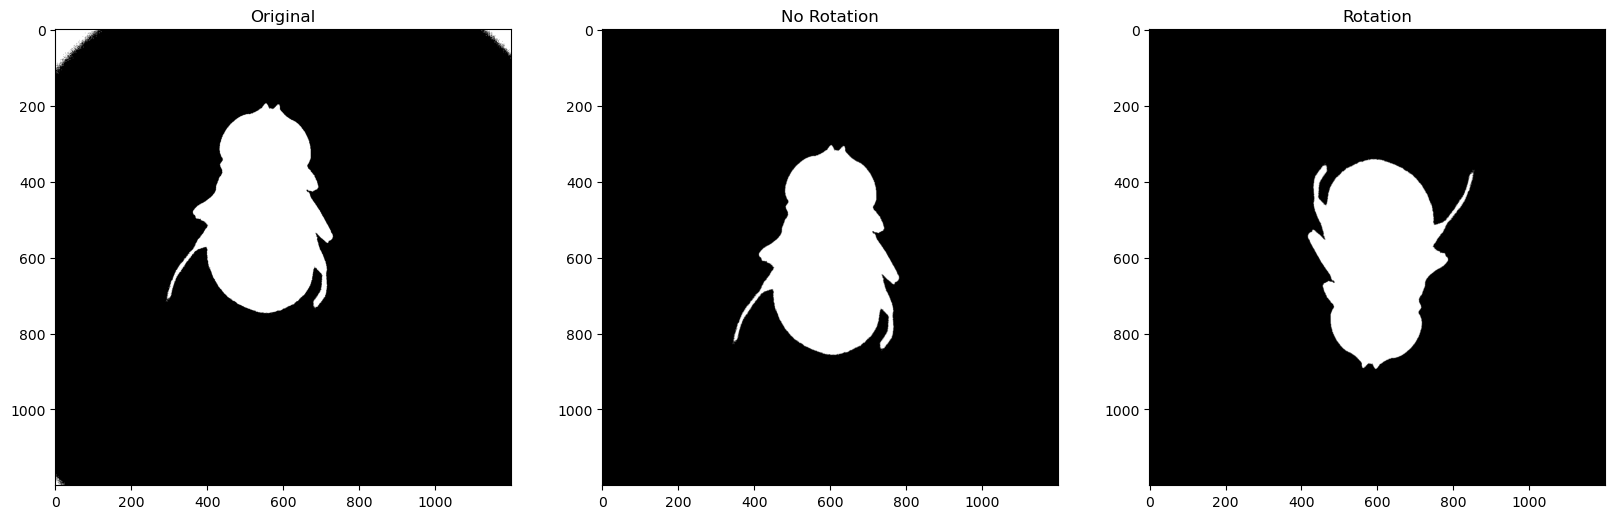

<< Original Angle: 112.91199304346884 >>
<< No Rotation Angle: 112.91199304346884 >>
<< Rotation Angle: -67.08800695653116 >>


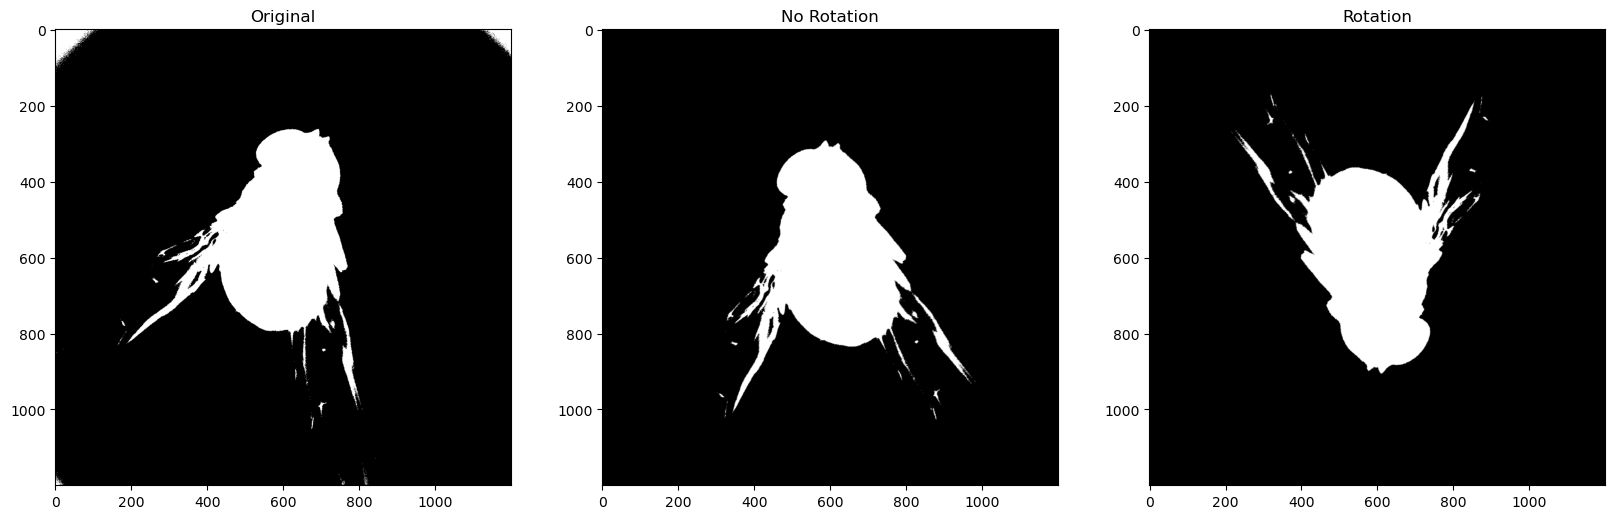

<< Original Angle: 106.00253400681831 >>
<< No Rotation Angle: 106.00253400681831 >>
<< Rotation Angle: -73.99746599318169 >>


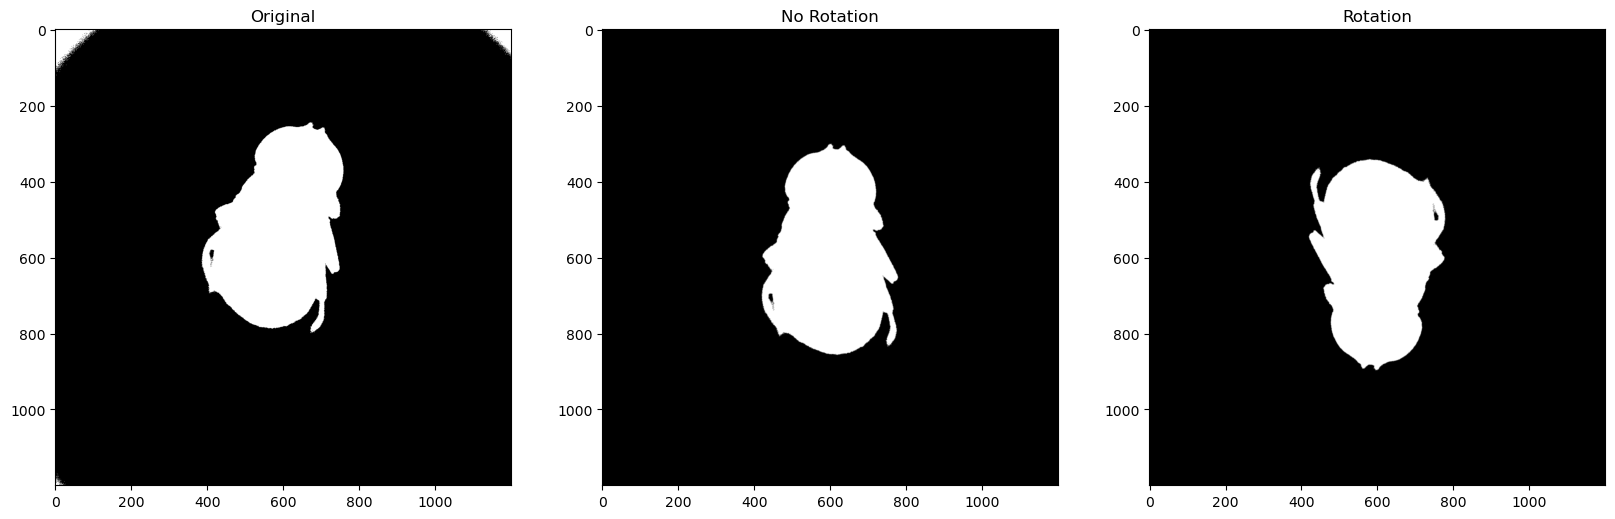

<< Original Angle: 152.3636992528504 >>
<< No Rotation Angle: 152.3636992528504 >>
<< Rotation Angle: -27.63630074714959 >>


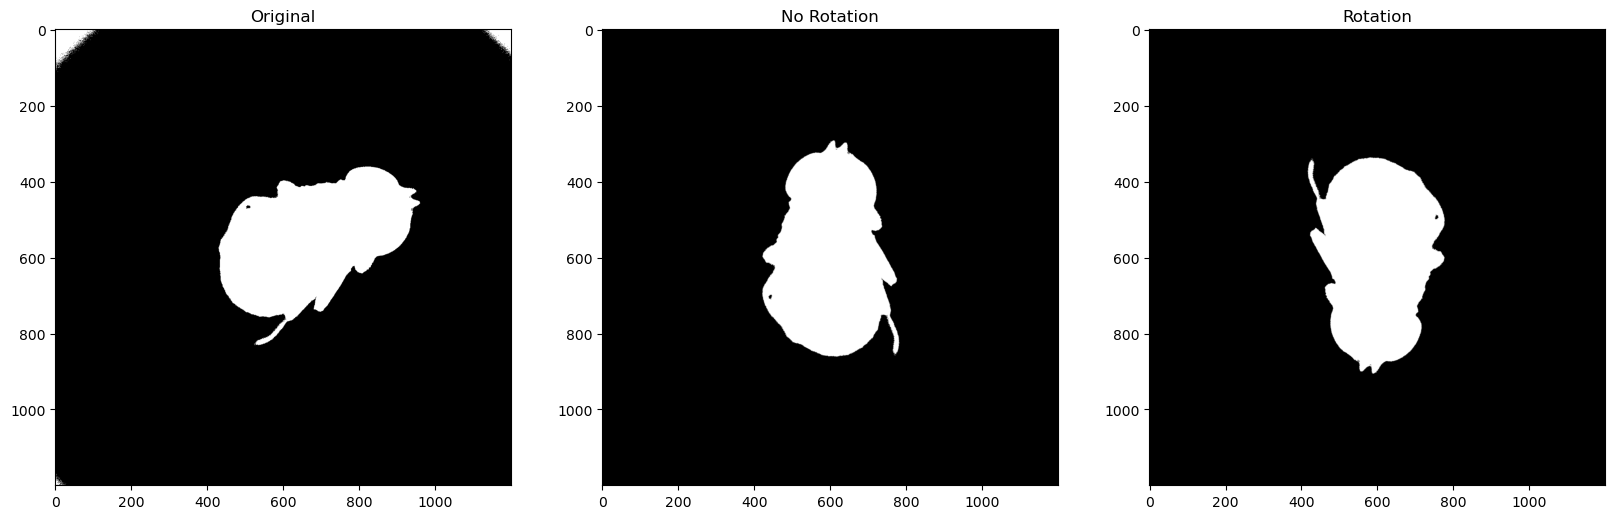

<< Original Angle: 63.56169166793237 >>
<< No Rotation Angle: 63.56169166793237 >>
<< Rotation Angle: -116.43830833206763 >>


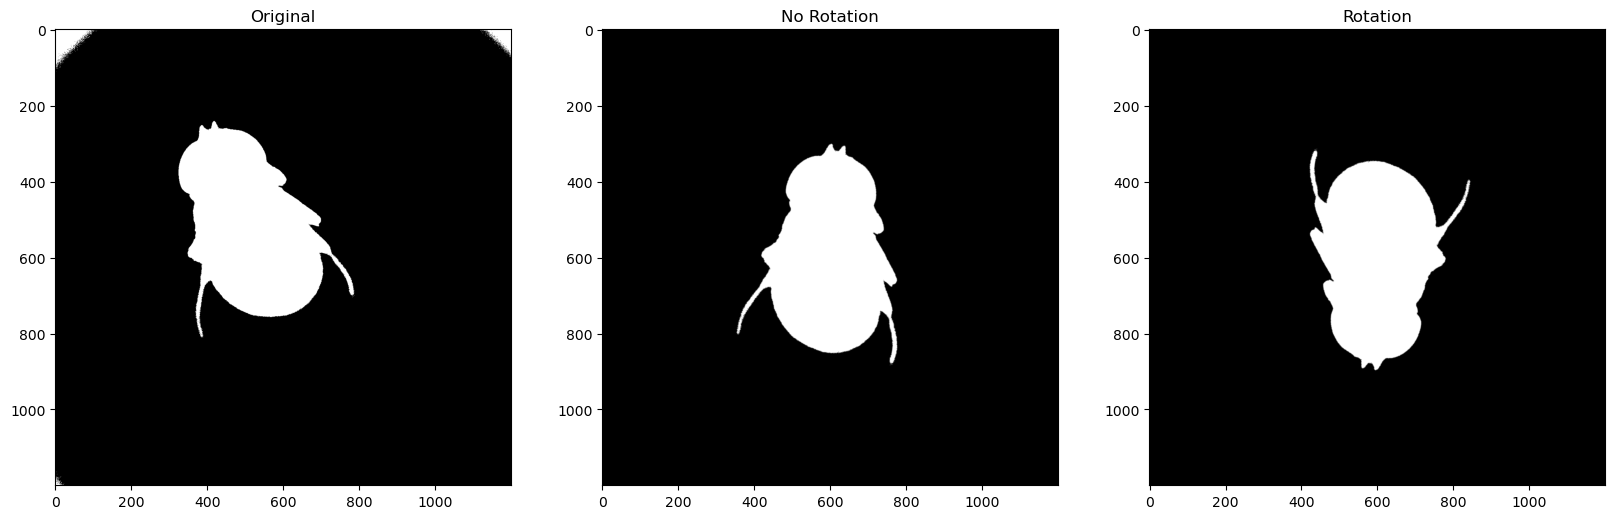

<< Original Angle: 90.79995427432002 >>
<< No Rotation Angle: 90.79995427432002 >>
<< Rotation Angle: -89.20004572567998 >>


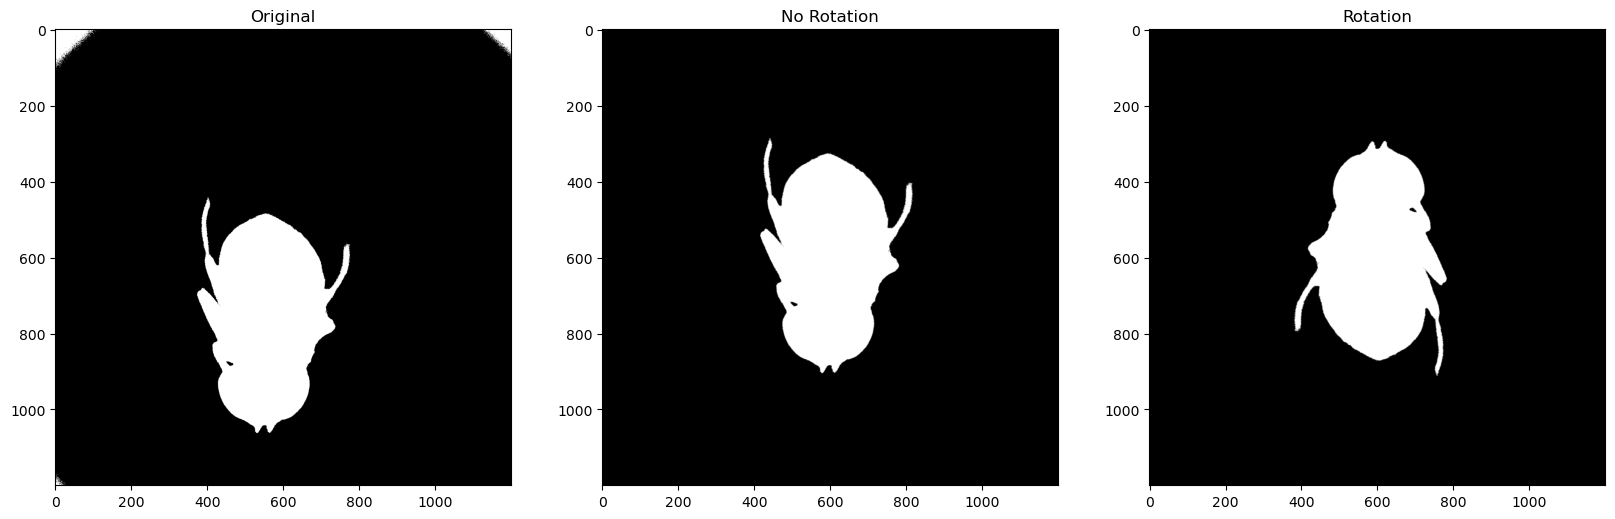

<< Original Angle: 106.8160023395611 >>
<< No Rotation Angle: 106.8160023395611 >>
<< Rotation Angle: -73.1839976604389 >>


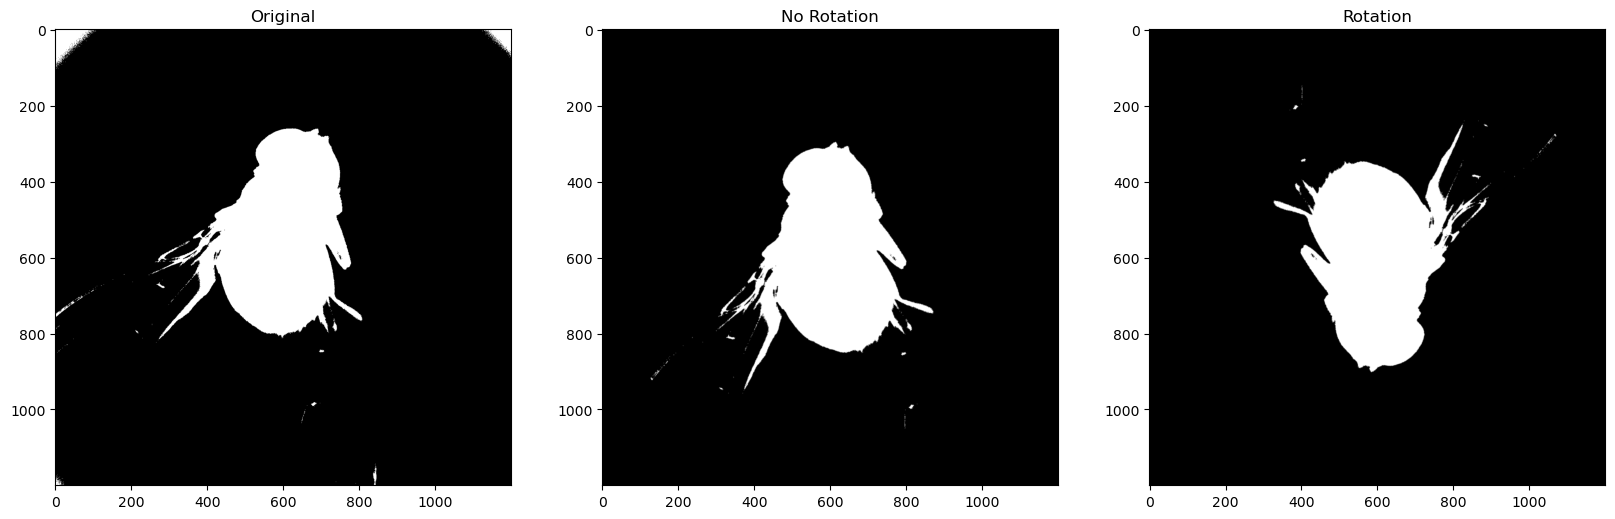

<< Original Angle: 89.82225660350498 >>
<< No Rotation Angle: 89.82225660350498 >>
<< Rotation Angle: -90.17774339649502 >>


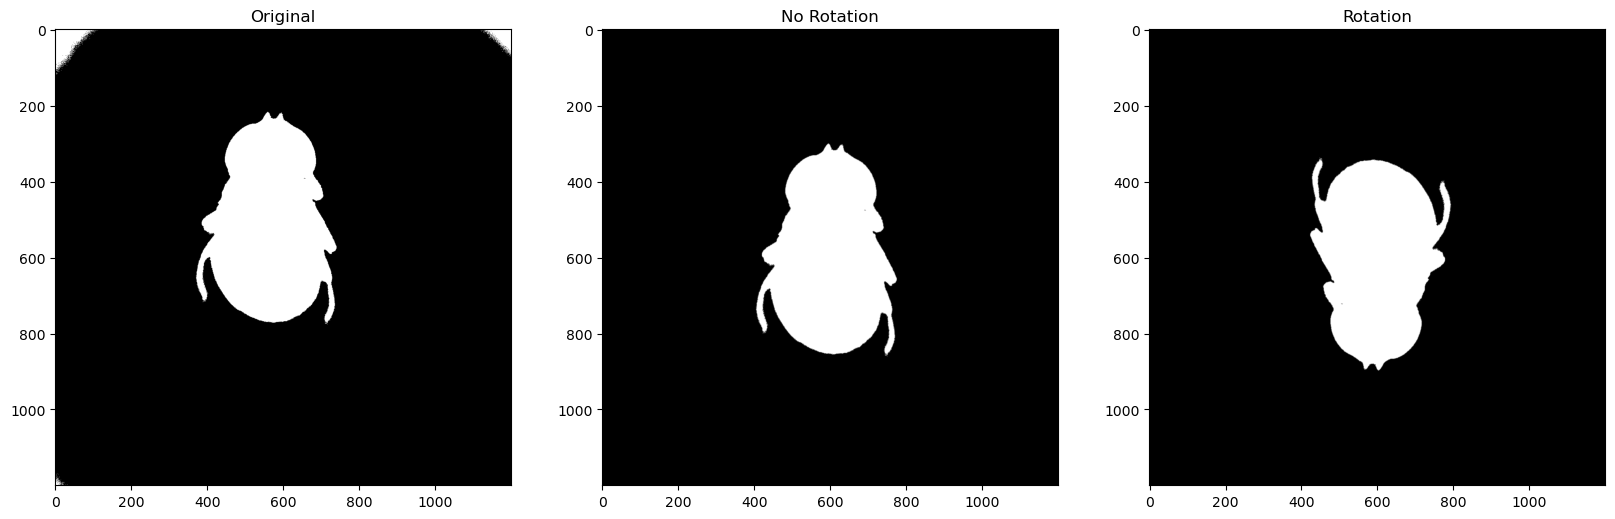

<< Original Angle: 62.779345678800134 >>
<< No Rotation Angle: 62.779345678800134 >>
<< Rotation Angle: -117.22065432119987 >>


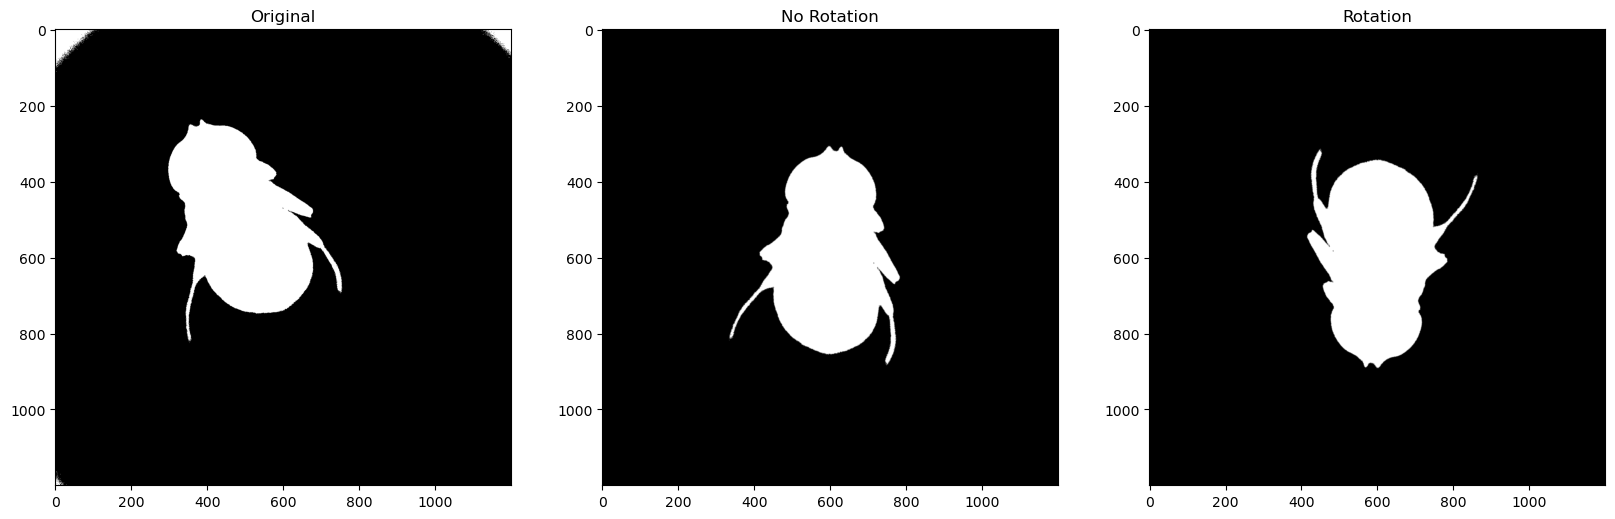

<< Original Angle: 118.05119572809532 >>
<< No Rotation Angle: 118.05119572809532 >>
<< Rotation Angle: -61.94880427190468 >>


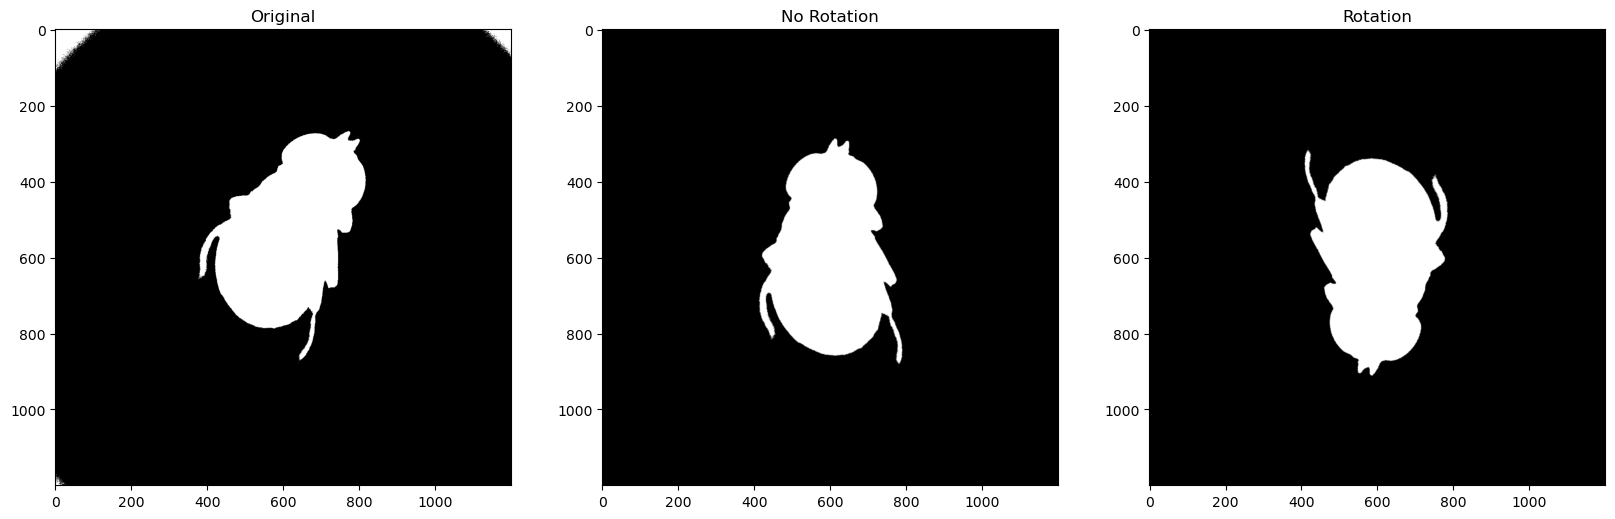

<< Original Angle: 52.29570340460043 >>
<< No Rotation Angle: 52.29570340460043 >>
<< Rotation Angle: -127.70429659539957 >>


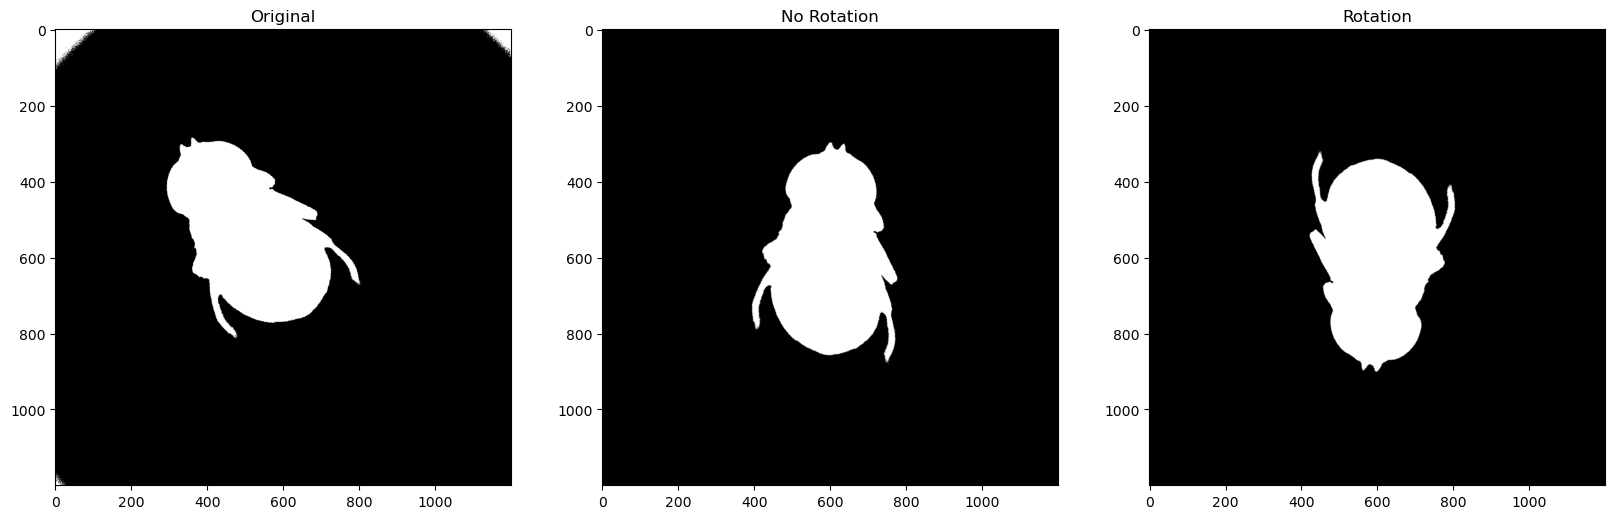

<< Original Angle: 101.46526533848758 >>
<< No Rotation Angle: 101.46526533848758 >>
<< Rotation Angle: -78.53473466151242 >>


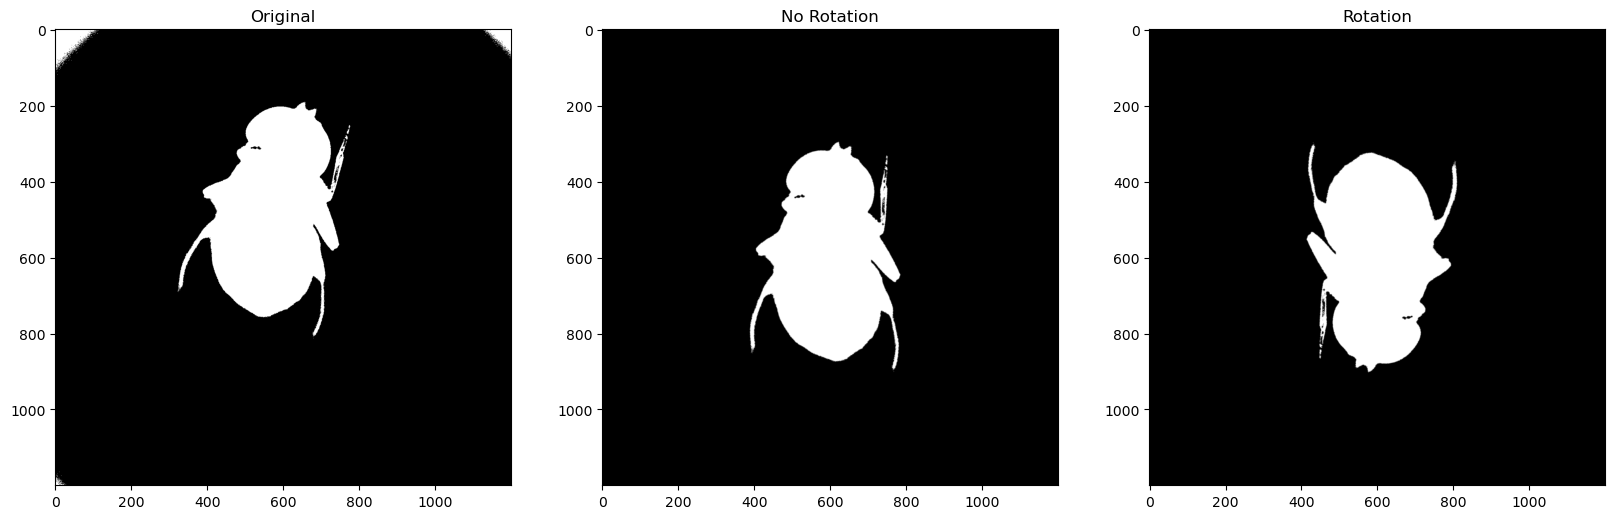

<< Original Angle: 104.9072927232672 >>
<< No Rotation Angle: 104.9072927232672 >>
<< Rotation Angle: -75.0927072767328 >>


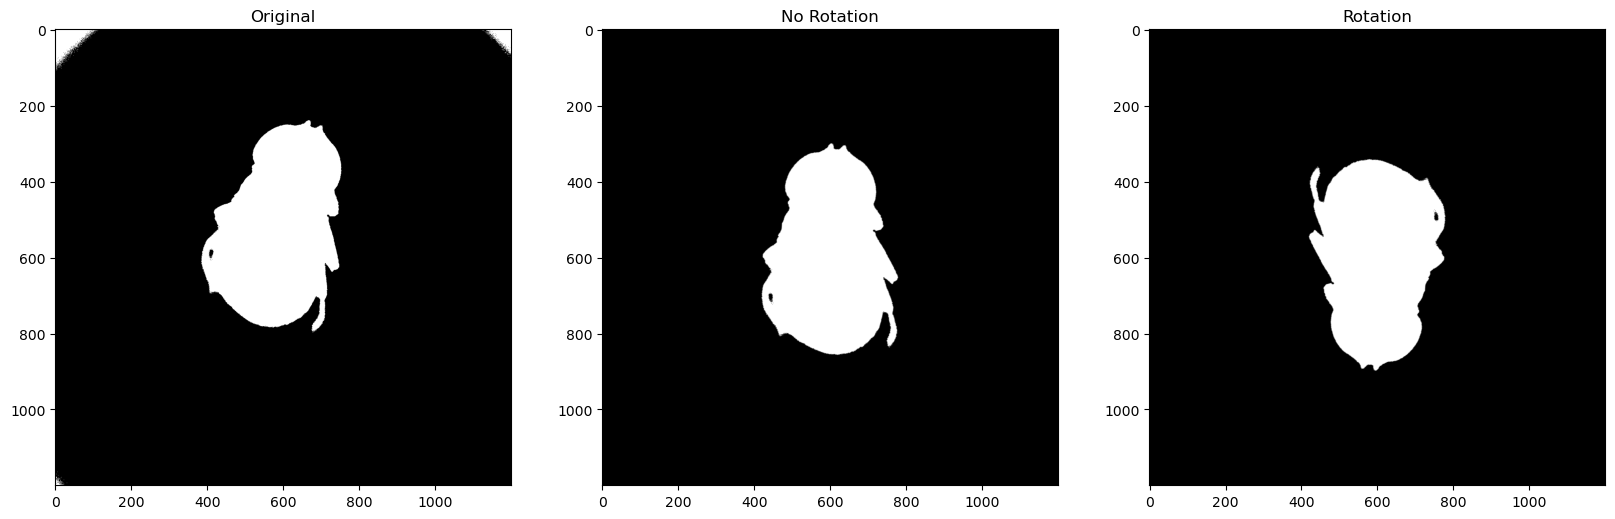

<< Original Angle: 96.86986687560743 >>
<< No Rotation Angle: 96.86986687560743 >>
<< Rotation Angle: -83.13013312439257 >>


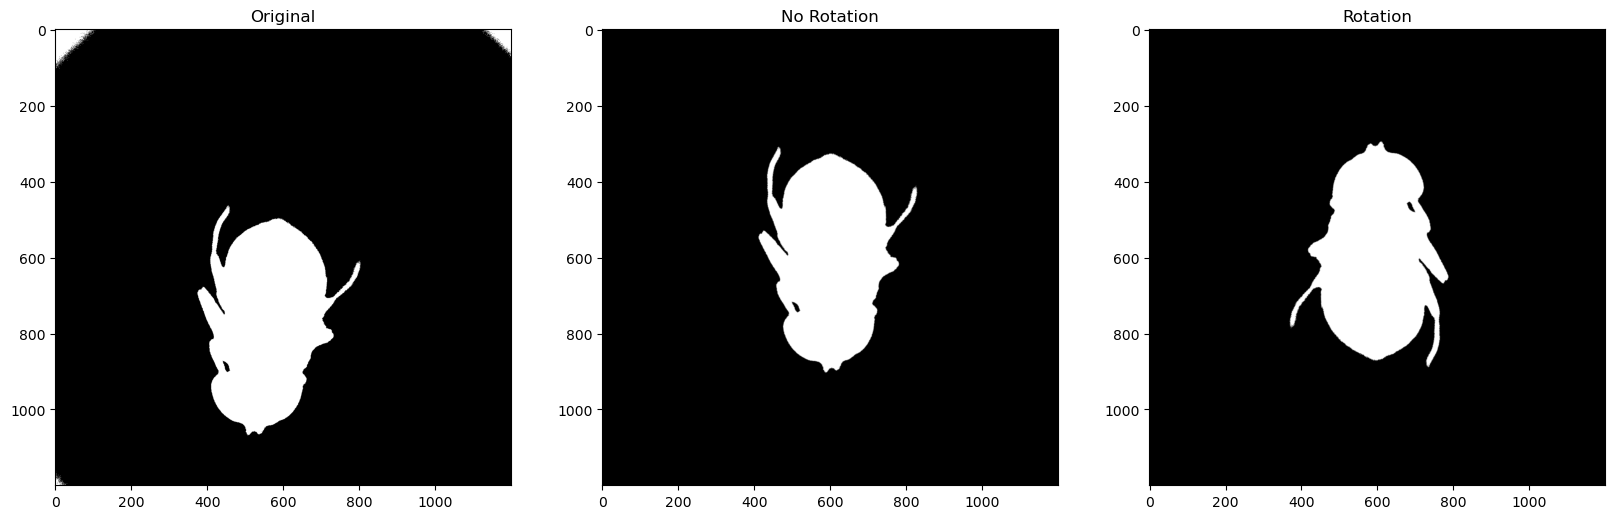

<< Original Angle: 146.45354706319296 >>
<< No Rotation Angle: 146.45354706319296 >>
<< Rotation Angle: -33.54645293680704 >>


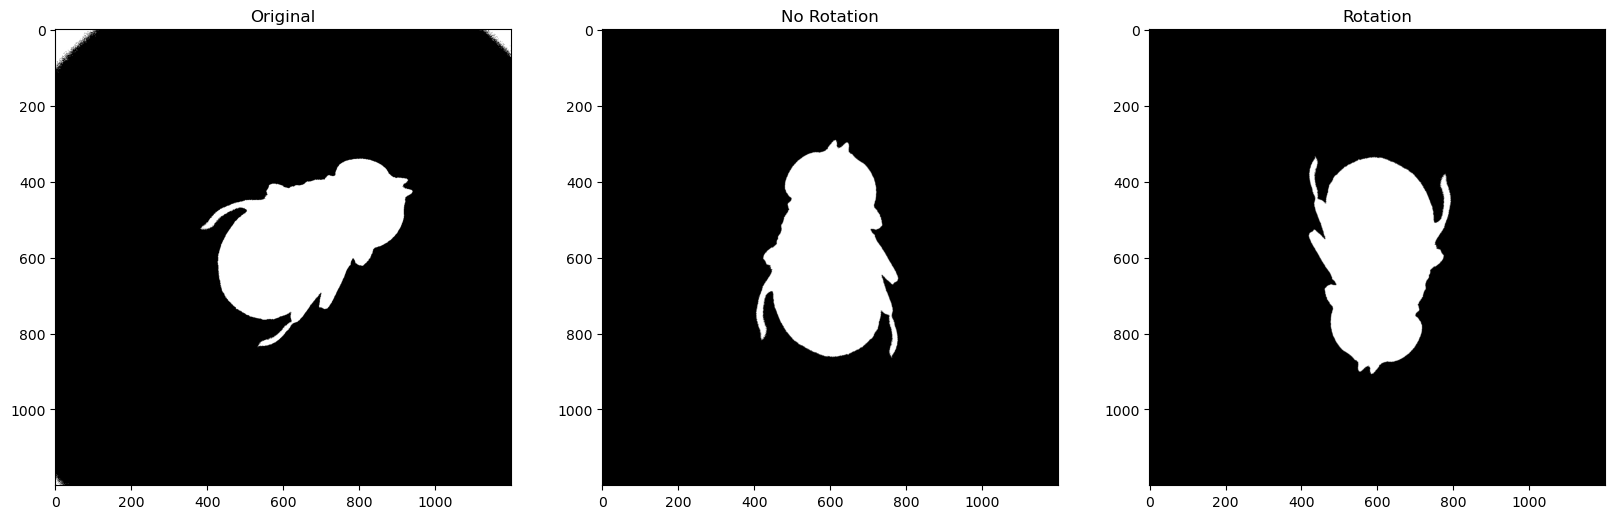

<< Original Angle: 64.71616845070832 >>
<< No Rotation Angle: 64.71616845070832 >>
<< Rotation Angle: -115.28383154929168 >>


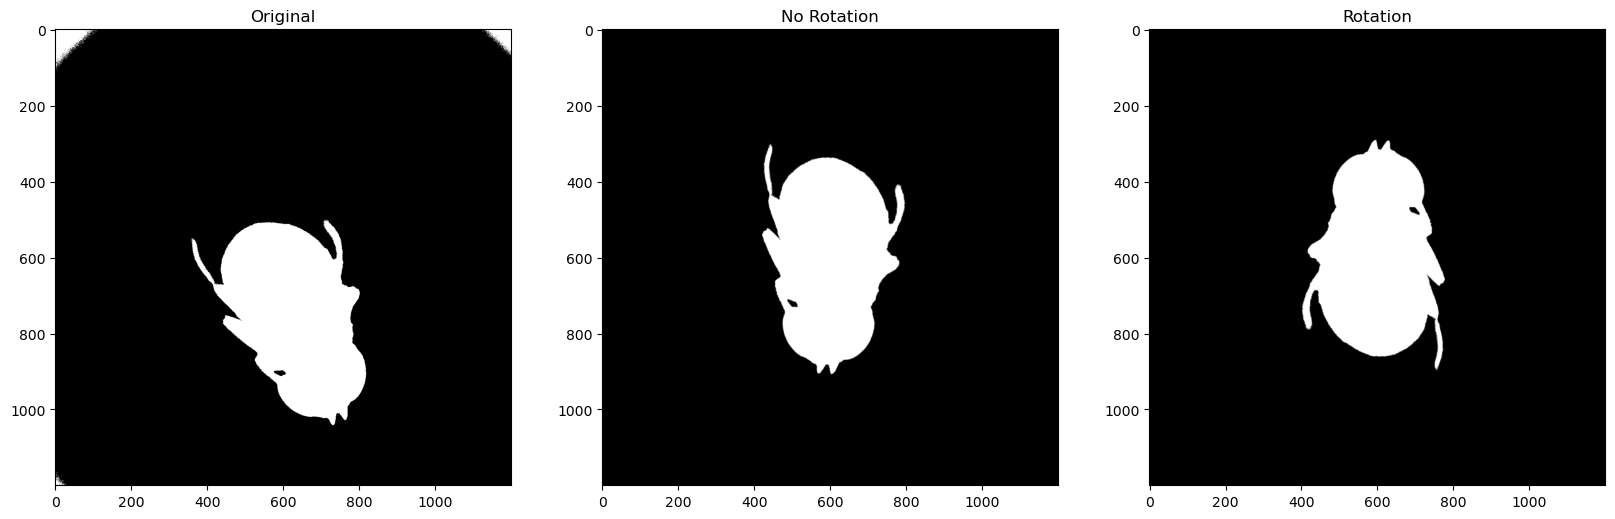

<< Original Angle: 59.29186002450742 >>
<< No Rotation Angle: 59.29186002450742 >>
<< Rotation Angle: -120.70813997549257 >>


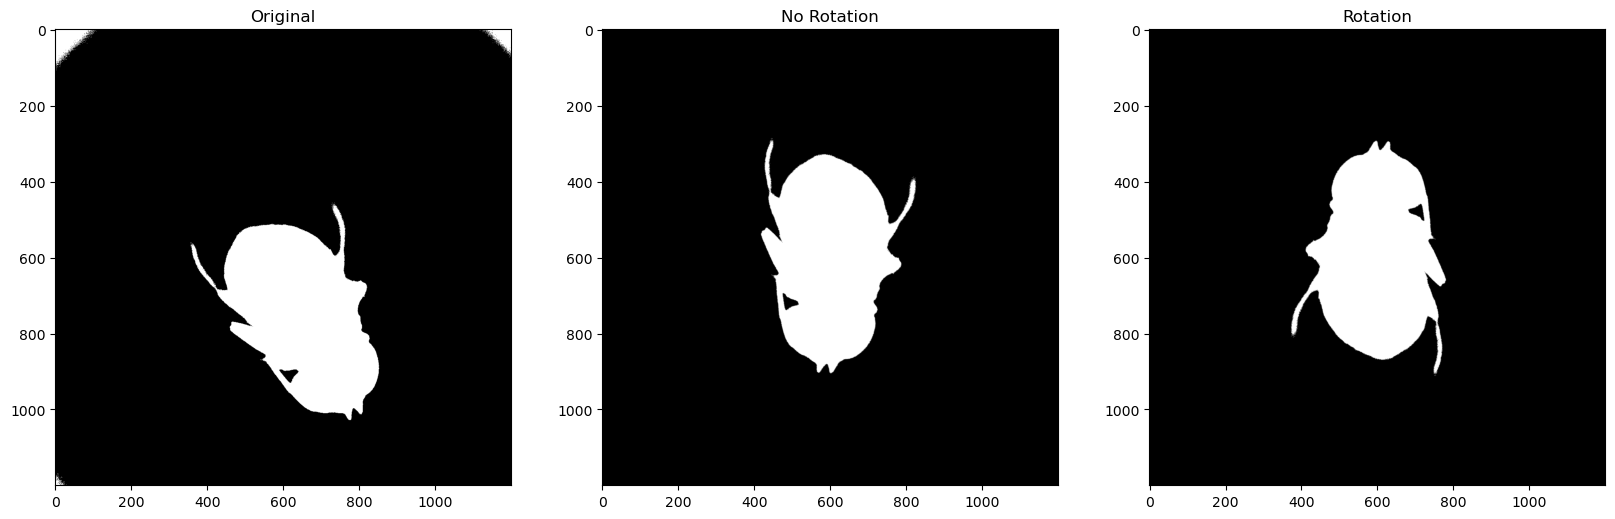

<< Original Angle: 83.80208437260404 >>
<< No Rotation Angle: 83.80208437260404 >>
<< Rotation Angle: -96.19791562739596 >>


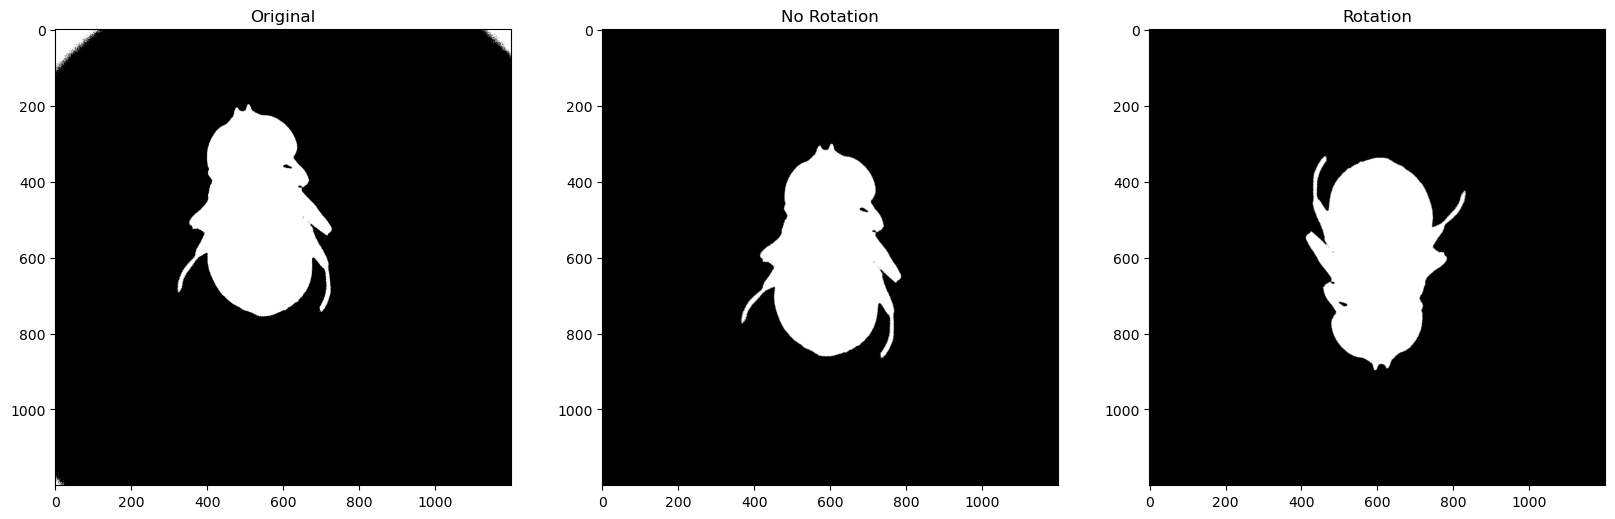

<< Original Angle: 87.13417965022113 >>
<< No Rotation Angle: 87.13417965022113 >>
<< Rotation Angle: -92.86582034977887 >>


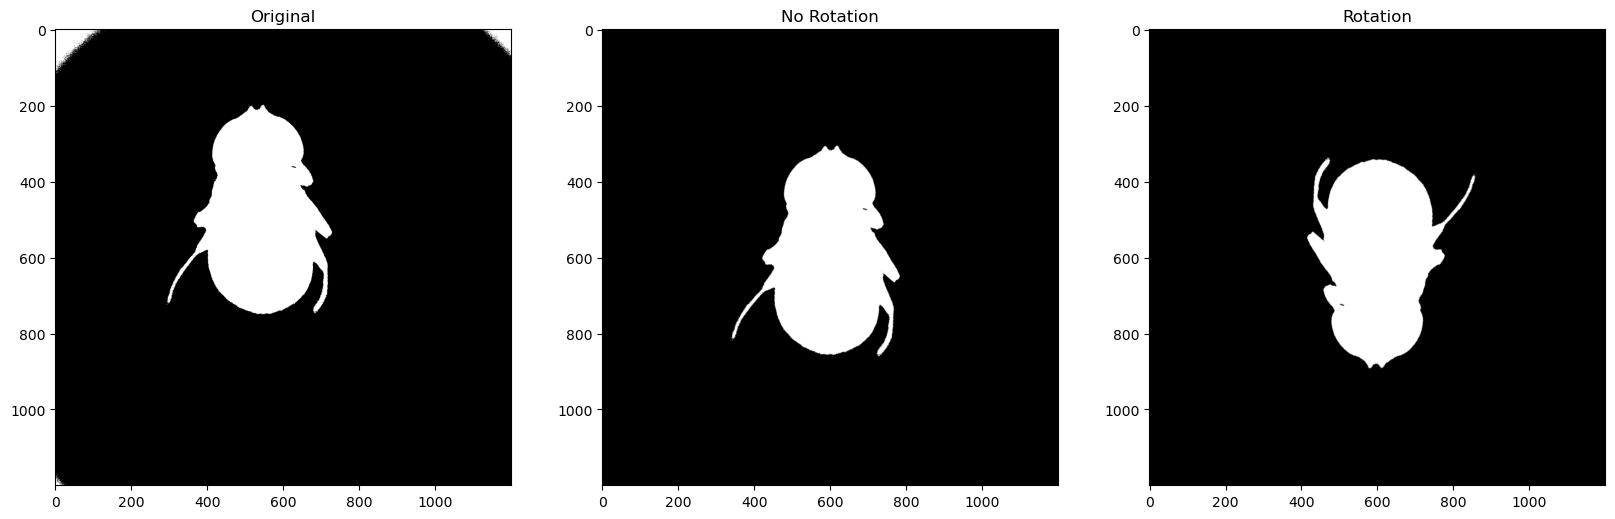

<< Original Angle: 121.72589866354566 >>
<< No Rotation Angle: 121.72589866354566 >>
<< Rotation Angle: -58.274101336454336 >>


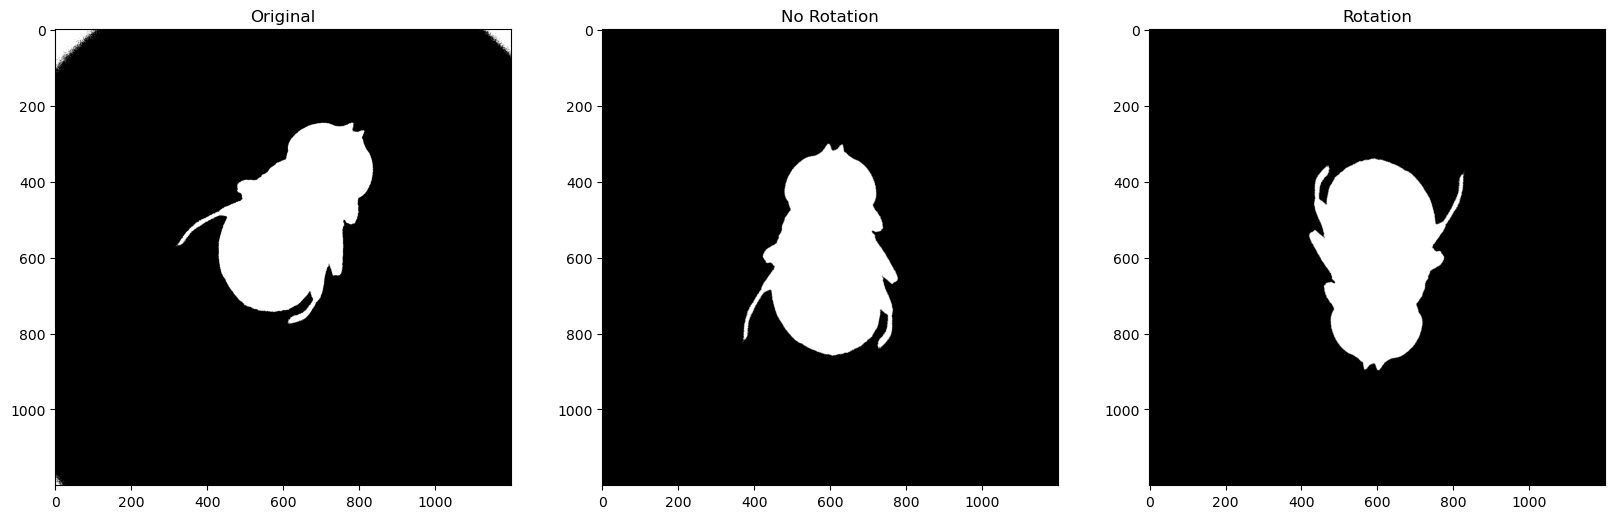

In [10]:
# get all of the files in the folder
# shuffled_list = sorted(glob.glob('/media/flyranch/T7 Shield/flyflipimgs/20240502125110/*.png'), key=lambda x: random.random())
shuffled_list = sorted(data, key=lambda x: random.random())
print(shuffled_list)
for file in shuffled_list[:20]:
    name = file.split('/')[-1].strip('.png')
    mask_fly = img_label(file)
    imgs[name] = mask_fly
    # execute function and then add these images and etc to the dictionary

## Average Fly Mask Template 
Using the 20 labelled images, a grayscale template mask will be developed of the fly facing upward. This average mask will then be tested against all images in the dataset to determine correct orientation.

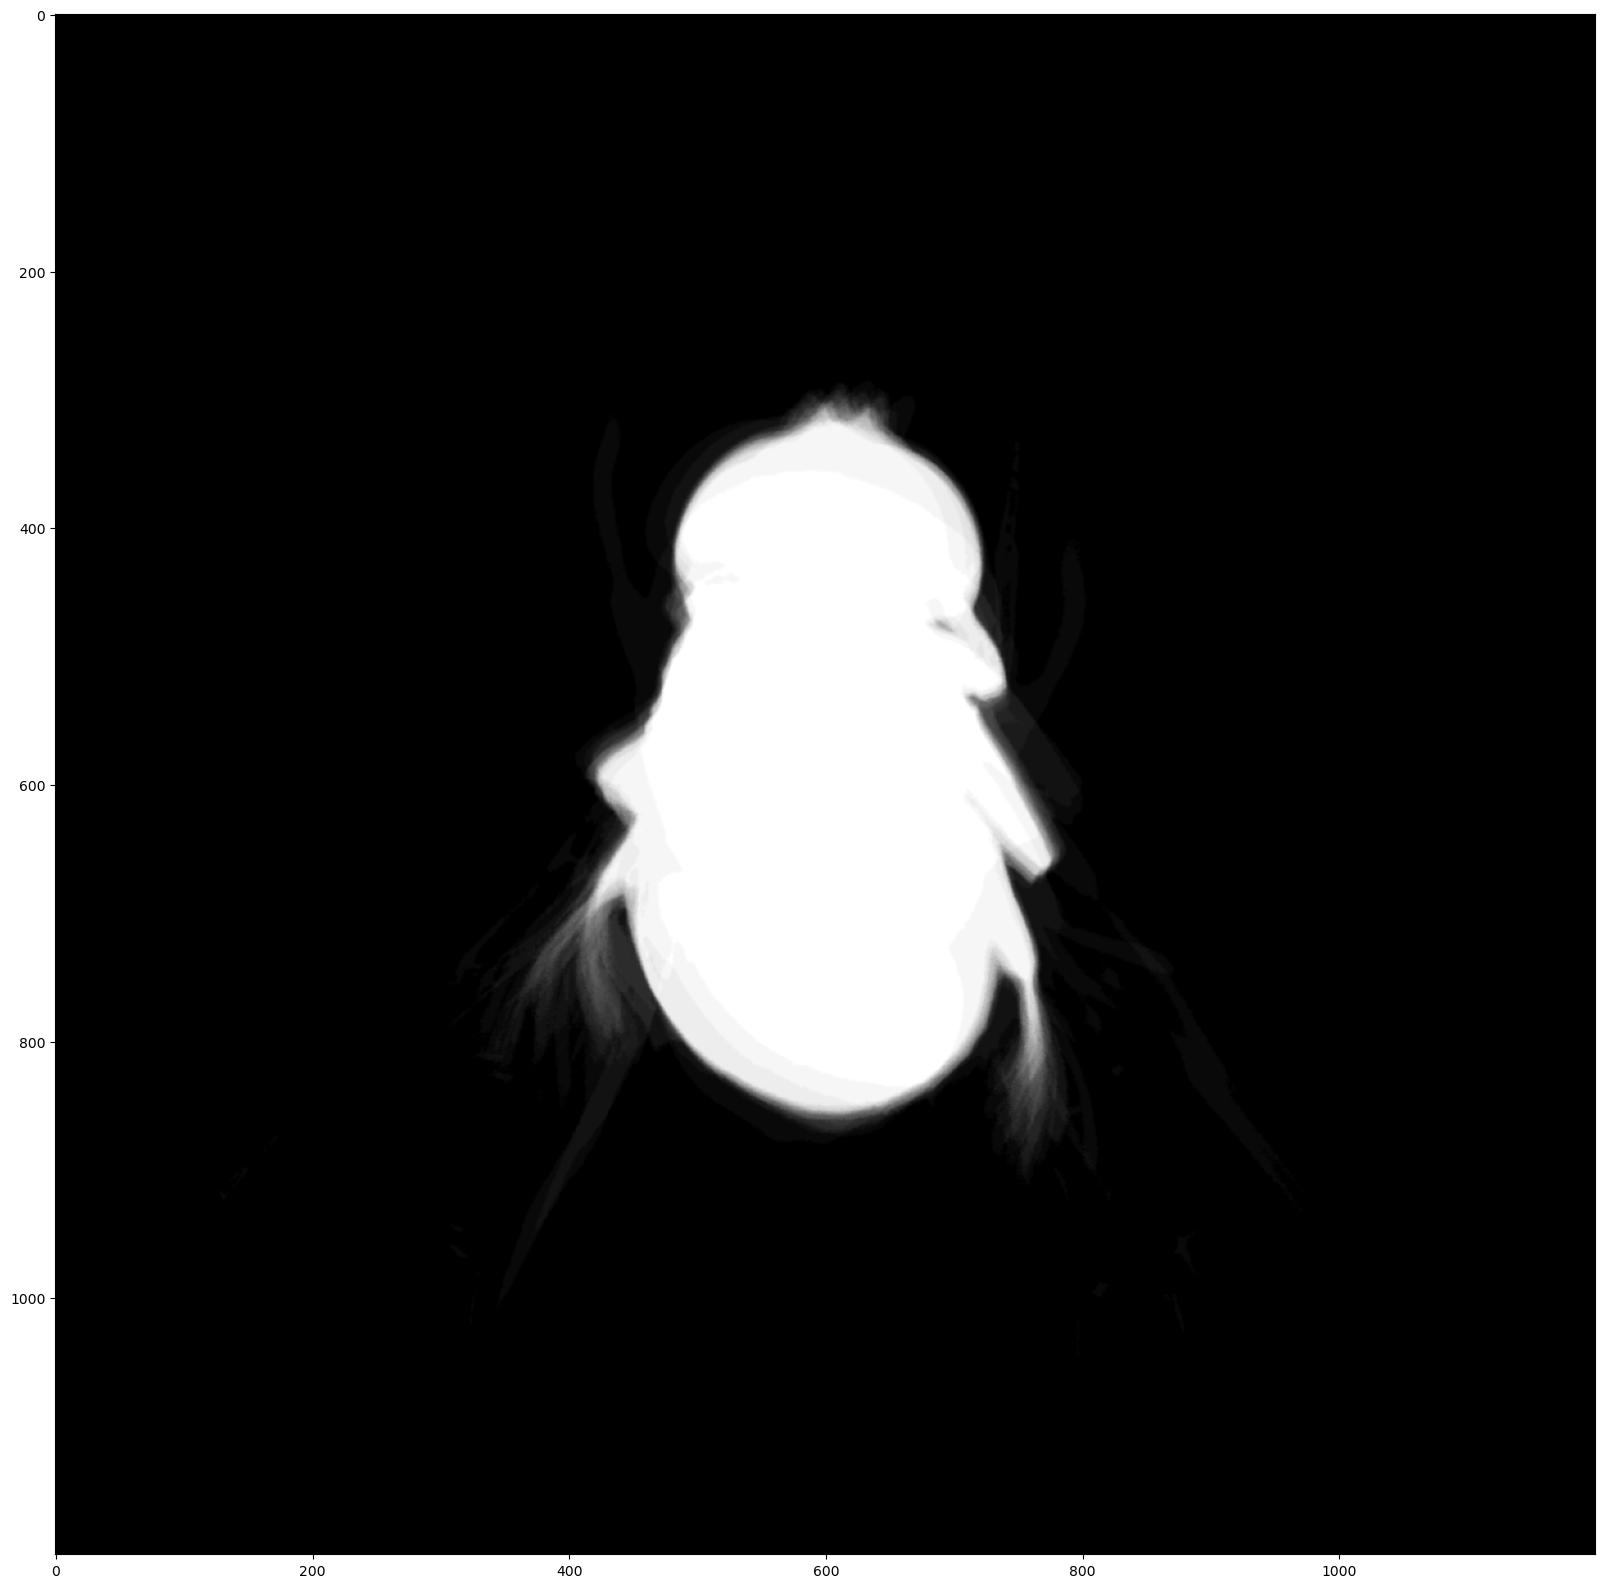

In [11]:
### Now with all the images we will create a mean tempate mask
final = []
for img in imgs.keys():
    final.append(imgs[img])
# print(final)
stacked = np.stack(final,axis=-1)
avg_mask = np.mean(stacked, axis = -1)
plt.figure(figsize=(20,20))
plt.imshow(avg_mask,cmap = 'gray')

## MSE Comparison
The entire image dataset will be tested against this average mask to determine the correct orientation of the fly. The MSE Rot and MSE No Rot will be logged as well as whether fly is No Rot or Rot.

In [12]:
## Comparison between two images
def mse(img1, img2):
    area_px = img1.shape[0]*img1.shape[1]
    px_diff = cv2.subtract(img1, img2)
    sum_err = np.sum(px_diff**2)
    mse = sum_err/(float(area_px))
    return mse
def data_mse(data):
    data_results = {
        "file":[],
        "type":[],
        "MSE":[]
    }
    for file in data:
        name = file.split('/')[-1].strip('.png')
        mask_fly = contour_hrz_matrix(file)[0].astype(float)
        ## No Rotation or Rotation
        d = {
            "MSE No Rotation":mse(avg_mask,mask_fly),
            "MSE Rotation": mse(avg_mask,cv2.rotate(mask_fly,cv2.ROTATE_180))
        }
        ## Save the min MSE Value
        data_results["file"].append(name)
        img_rot_type = list(d.keys())[list(d.values()).index(min(list(d.values())))]
        data_results['type'].append(img_rot_type)
        data_results["MSE"].append((d["MSE No Rotation"],d["MSE Rotation"])) # both MSE values...
    return data_results


The `data_mse` function can take from 10-15 min based on size of the dataset.

In [13]:
results = data_mse(data)
results

{'file': ['20240502125110_0008',
  '20240502125110_0011',
  '20240502125110_0024',
  '20240502125110_0026',
  '20240502125110_0027',
  '20240502125110_0029',
  '20240502125110_0031',
  '20240502125110_0041',
  '20240502125110_0046',
  '20240502125110_0052',
  '20240502125110_0062',
  '20240502125110_0104',
  '20240502125110_0105',
  '20240502125110_0138',
  '20240502125110_0192',
  '20240502125110_0203',
  '20240502125110_0209',
  '20240502125110_0212',
  '20240502125110_0215',
  '20240502125110_0230',
  '20240502125110_0235',
  '20240502125110_0240',
  '20240502125110_0258',
  '20240502125110_0259',
  '20240502125110_0265',
  '20240502125110_0292',
  '20240502125110_0296',
  '20240502125110_0306',
  '20240502125110_0307',
  '20240502125110_0311',
  '20240502125110_0330',
  '20240502125110_0351',
  '20240502125110_0370',
  '20240502125110_0376',
  '20240502125110_0407',
  '20240502125110_0410',
  '20240502125110_0415',
  '20240502125110_0422',
  '20240502125110_0423',
  '20240502125110

The dictionary is then transformed into a dataframe for additional processing and subsequent plotting

In [16]:
results_df = pd.DataFrame(results)
results_df.head()

,file,type,MSE
0,20240502125110_0008,MSE No Rotation,5319.381359
1,20240502125110_0011,MSE No Rotation,6931.885774
2,20240502125110_0024,MSE No Rotation,6675.667631
3,20240502125110_0026,MSE No Rotation,6978.469379
4,20240502125110_0027,MSE No Rotation,7136.858531


## Plot of MSE ERROR No Rotation vs Rotation for Large Dataset

Using the average mask from before we will now look at all the images in the dataset to determine accuracy. 

In [ ]:

# Plot Type MSE NO ROTATION with VALUE MSE (X AXIS)
# Plot TYPE MSE ROTATIO with VALUE MSE (Y axis)

# EXTRAS

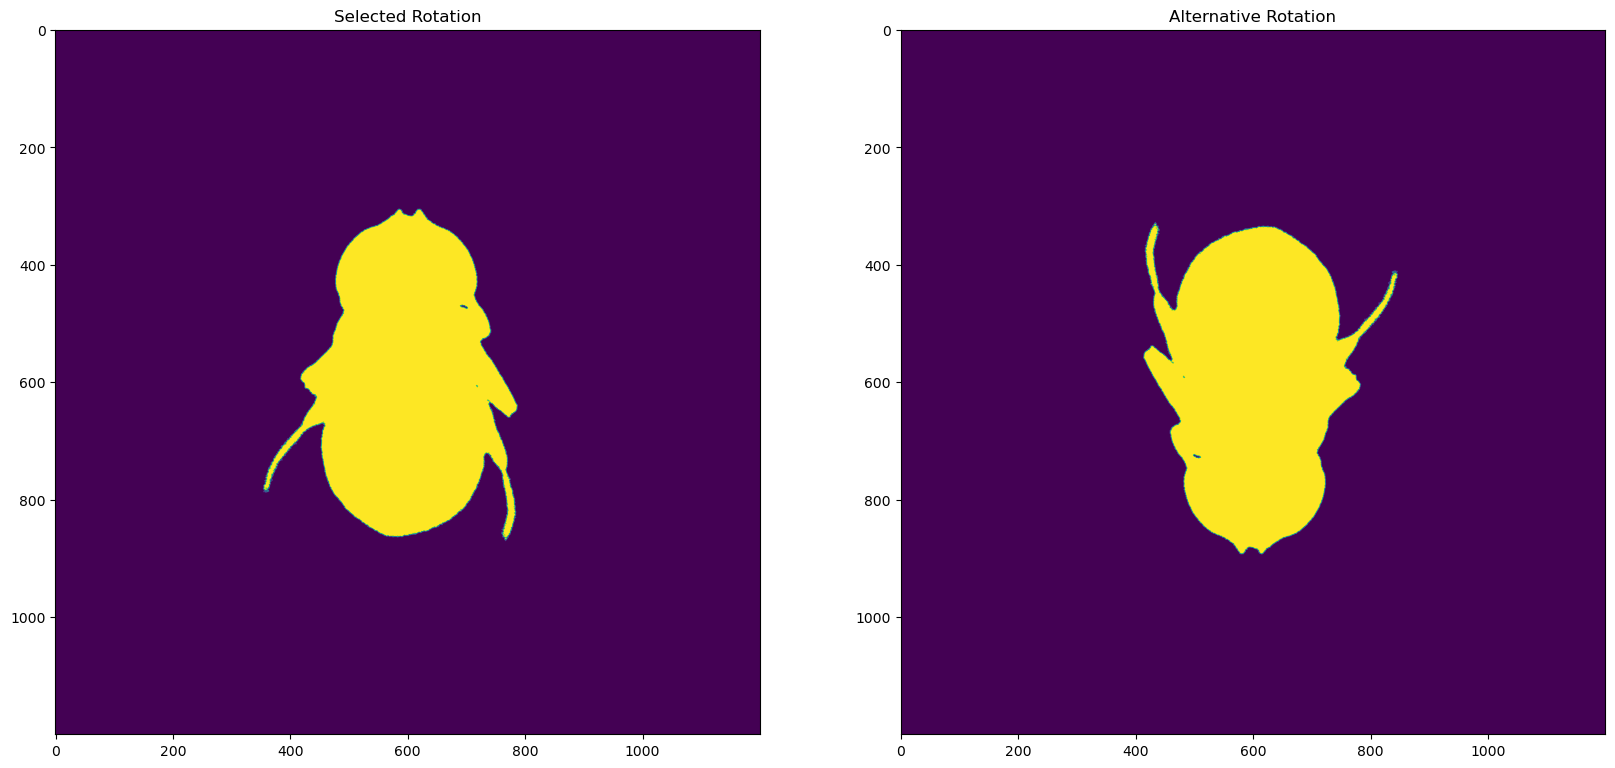

In [42]:
## Test Image (18th image in the stack)
img1 = imgs[list(imgs.keys())[18]].astype('float64')
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title("Selected Rotation")
plt.imshow(img1) 
plt.subplot(122)
plt.title("Alternative Rotation")
plt.imshow(cv2.rotate(img1,cv2.ROTATE_180))

In [43]:
## Comparison between two images
def mse(img1, img2):
    area_px = img1.shape[0]*img1.shape[1]
    px_diff = cv2.subtract(img1, img2)
    sum_err = np.sum(px_diff**2)
    mse = sum_err/(float(area_px))
    return mse
error = mse(avg_mask,img1)
error2 = mse(avg_mask,cv2.rotate(img1,cv2.ROTATE_180))
print("No rotation:",error)
print("Rotation:",error2)

No rotation: 255.10822447569433
Rotation: 1138.383849197916


In [20]:
fly_mask_hrz = fly_mask_hrz.astype('float64')
error = mse(avg_mask,fly_mask_hrz)
error2 = mse(avg_mask,cv2.rotate(fly_mask_hrz,cv2.ROTATE_180))
print("No rotation:",error)
print("Rotation:",error2)

No rotation: 1946.0575228090283
Rotation: 1709.1743328090274
